In [89]:
import pandas as pd
import numpy as np

df = pd.read_csv('national_2015-01_2025-01 (1).csv')
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# For demonstration purposes, let's create synthetic time series data
# by adding more dates with slight variations to simulate trends
countries = df['country'].unique()
dates = pd.date_range(start='2015-01-01', end='2021-12-01', freq='MS')  # Monthly data
extended_df = []

for country in countries:
    country_data = df[df['country'] == country].iloc[0]
    base_value = country_data['predicted']
    error = country_data['predicted_error']
    
    for date in dates:
        # Create a synthetic trend with some randomness
        random_factor = np.random.normal(0, 0.05)  # Random variation
        time_factor = (date - pd.Timestamp('2020-02-01')).days / 365  # Time-based trend
        new_value = min(max(base_value + time_factor * 0.1 * random_factor, 0), 1)  # Keep between 0 and 1
        
        extended_df.append({
            'country': country,
            'gid_0': country_data['gid_0'],
            'date': date,
            'outcome': 'internet_fm_ratio',
            'predicted': new_value,
            'predicted_error': error
        })

extended_df = pd.DataFrame(extended_df)


In [90]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
import plotly.graph_objects as go

# Initialize the Dash app
app = Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Internet Gender Ratio Dashboard", 
            style={'textAlign': 'center', 'color': '#5473FF', 'marginBottom': '20px'}),
    
    html.Div([
        html.Label("Select Countries:", style={'fontSize': '18px', 'marginRight': '10px'}),
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in sorted(extended_df['country'].unique())],
            value=['United Arab Emirates', 'Australia', 'Afghanistan'],  # Default selected countries
            multi=True,
            style={'width': '100%', 'marginBottom': '20px'}
        )
    ], style={'width': '80%', 'margin': '0 auto'}),
    
    dcc.Graph(id='internet-ratio-graph'),
    
    html.Div([
        html.P("Internet Female-to-Male Ratio: Values closer to 1 indicate equal internet usage between genders.",
               style={'textAlign': 'center', 'fontSize': '16px', 'marginTop': '20px'})
    ])
], style={'padding': '20px'})

# Define callback to update the graph based on dropdown selection
@callback(
    Output('internet-ratio-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_countries):
    if not selected_countries:
        # If no countries are selected, show an empty plot with a message
        fig = go.Figure()
        fig.update_layout(
            title="Please select at least one country from the dropdown",
            xaxis_title="Date",
            yaxis_title="Internet Female-to-Male Ratio",
            template="plotly_white"
        )
        return fig
    
    # Filter data for selected countries
    filtered_df = extended_df[extended_df['country'].isin(selected_countries)]
    
    # Create line plot
    fig = px.line(filtered_df, 
                 x='date', 
                 y='predicted', 
                 color='country',
                 labels={'predicted': 'Internet Female-to-Male Ratio', 'date': 'Date'},
                 title='Internet Female-to-Male Ratio Over Time')
    
    # Add error bands
    for country in selected_countries:
        country_data = filtered_df[filtered_df['country'] == country]
        # fig.add_traces(
        #     go.Scatter(
        #         name='Upper Bound',
        #         x=country_data['date'],
        #         y=country_data['predicted'] + country_data['predicted_error'],
        #         mode='lines',
        #         marker=dict(color="#444"),
        #         line=dict(width=0),
        #         showlegend=False
        #     )
        # )
        # fig.add_traces(
        #     go.Scatter(
        #         name='Lower Bound',
        #         x=country_data['date'],
        #         y=country_data['predicted'] - country_data['predicted_error'],
        #         marker=dict(color="#444"),
        #         line=dict(width=0),
        #         mode='lines',
        #         fillcolor='rgba(68, 68, 68, 0.3)',
        #         fill='tonexty',
        #         showlegend=False
        #     )
        # )
    
    # Update layout
    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Internet Female-to-Male Ratio",
        yaxis=dict(range=[0, 1.1]),
        hovermode="x unified",
        template="plotly_white",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Read the data from a CSV (adjust file name/path as needed)
#    For demonstration, let's call the file "occupation_income.csv"
df = pd.read_csv("SDG_0851_SEX_OCU_NB_A-full-2025-03-18.csv")


In [2]:
df_1 = pd.read_csv("SDG_0861_SEX_RT_A-20250321T0635.csv")

df_1.head()

df_1 = df_1[
    (df_1['sex.label'].str.contains('Male|Female', case=False, na=False))]

In [3]:
df_1 = df_1[['ref_area.label','sex.label', 'obs_value', 'time']]

In [4]:
df_1.head()
df_1.columns = ['Country', 'Sex', 'Value', 'Time']

# replace the sex: with empty string
df_1['Sex'] = df_1['Sex'].str.replace("Sex:", "")   

In [5]:
df_1.head()

,Country,Sex,Value,Time
1,Aruba,Male,17.400,2010
2,Aruba,Female,15.640,2010
4,Afghanistan,Male,19.632,2021
5,Afghanistan,Female,65.079,2021
7,Afghanistan,Male,32.164,2020


In [6]:
df_1.to_csv('Uneducation.csv', index=False)

In [7]:
df = df[
    (df['sex.label'].str.contains('Male|Female', case=False, na=False)) &
    (df['classif1.label'].str.contains('(ISCO-08)', case=False, na=False))
]

/tmp/ipykernel_27714/1796846498.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df['classif1.label'].str.contains('(ISCO-08)', case=False, na=False))


In [8]:
df.head(2)

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
27,Afghanistan,LFS - Labour Force Survey,SDG indicator 8.5.1 - Average hourly earnings ...,Sex: Male,Occupation (ISCO-08): Total,2020,81.53,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...
28,Afghanistan,LFS - Labour Force Survey,SDG indicator 8.5.1 - Average hourly earnings ...,Sex: Male,Occupation (ISCO-08): 1. Managers,2020,113.01,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...


In [9]:
df_new = df[['ref_area.label', 'sex.label', 'time', 'classif1.label', 'obs_value']]

In [10]:
df_new.head(2)

,ref_area.label,sex.label,time,classif1.label,obs_value
27,Afghanistan,Sex: Male,2020,Occupation (ISCO-08): Total,81.53
28,Afghanistan,Sex: Male,2020,Occupation (ISCO-08): 1. Managers,113.01


In [11]:
# Pivot the data to have 'Skill level' and 'sex.label' as columns
df_pivot = df_new.pivot_table(index=['ref_area.label','time'], columns=['classif1.label', 'sex.label'], values='obs_value', aggfunc='first').reset_index()

In [12]:
# drop last two levels of the multi-index columns
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]



In [13]:
df_pivot.head(2)

,ref_area.label_,time_,Occupation (ISCO-08): 0. Armed forces occupations_Sex: Female,Occupation (ISCO-08): 0. Armed forces occupations_Sex: Male,Occupation (ISCO-08): 1. Managers_Sex: Female,Occupation (ISCO-08): 1. Managers_Sex: Male,Occupation (ISCO-08): 2. Professionals_Sex: Female,Occupation (ISCO-08): 2. Professionals_Sex: Male,Occupation (ISCO-08): 3. Technicians and associate professionals_Sex: Female,Occupation (ISCO-08): 3. Technicians and associate professionals_Sex: Male,...,Occupation (ISCO-08): 7. Craft and related trades workers_Sex: Female,Occupation (ISCO-08): 7. Craft and related trades workers_Sex: Male,"Occupation (ISCO-08): 8. Plant and machine operators, and assemblers_Sex: Female","Occupation (ISCO-08): 8. Plant and machine operators, and assemblers_Sex: Male",Occupation (ISCO-08): 9. Elementary occupations_Sex: Female,Occupation (ISCO-08): 9. Elementary occupations_Sex: Male,Occupation (ISCO-08): Total_Sex: Female,Occupation (ISCO-08): Total_Sex: Male,Occupation (ISCO-08): X. Not elsewhere classified_Sex: Female,Occupation (ISCO-08): X. Not elsewhere classified_Sex: Male
0,Afghanistan,2014,0.00,67.62,120.18,100.55,75.04,88.85,78.20,87.11,...,18.68,42.47,NaN,59.16,55.43,37.45,49.77,53.68,47.7,63.65
1,Afghanistan,2020,92.97,59.01,253.82,113.01,221.47,163.75,85.33,64.42,...,52.93,41.42,NaN,74.30,52.04,42.67,183.93,81.53,NaN,129.07


In [14]:
col_name = df_pivot.columns.to_list()

# remove the _ from the column names
col_name = [col.replace('_',' ') for col in col_name[:2]] + [col.replace('Occupation (ISCO-08): ','') for col in col_name[2:]]



In [15]:
col_name

['ref area.label ',
 'time ',
 '0. Armed forces occupations_Sex: Female',
 '0. Armed forces occupations_Sex: Male',
 '1. Managers_Sex: Female',
 '1. Managers_Sex: Male',
 '2. Professionals_Sex: Female',
 '2. Professionals_Sex: Male',
 '3. Technicians and associate professionals_Sex: Female',
 '3. Technicians and associate professionals_Sex: Male',
 '4. Clerical support workers_Sex: Female',
 '4. Clerical support workers_Sex: Male',
 '5. Service and sales workers_Sex: Female',
 '5. Service and sales workers_Sex: Male',
 '6. Skilled agricultural, forestry and fishery workers_Sex: Female',
 '6. Skilled agricultural, forestry and fishery workers_Sex: Male',
 '7. Craft and related trades workers_Sex: Female',
 '7. Craft and related trades workers_Sex: Male',
 '8. Plant and machine operators, and assemblers_Sex: Female',
 '8. Plant and machine operators, and assemblers_Sex: Male',
 '9. Elementary occupations_Sex: Female',
 '9. Elementary occupations_Sex: Male',
 'Total_Sex: Female',
 'Total_

In [16]:
# rename columns as ['country', 'time', 'Army_Female', 'Army_male'...]
# rename 
df_pivot.columns = col_name

In [17]:
df_pivot.drop(columns=['Total_Sex: Female',
 'Total_Sex: Male',
 'X. Not elsewhere classified_Sex: Female',
 'X. Not elsewhere classified_Sex: Male'], inplace=True)

In [18]:
df_pivot.dropna(inplace=True)

In [19]:
# no of values for each country
df_pivot['ref area.label '].value_counts()

ref area.label 
Mongolia                                                13
Portugal                                                13
Brazil                                                  13
Viet Nam                                                13
Mexico                                                  11
France                                                  10
Czechia                                                  9
Dominican Republic                                       9
United Kingdom of Great Britain and Northern Ireland     9
Republic of Moldova                                      7
Sri Lanka                                                7
Finland                                                  7
Italy                                                    7
Switzerland                                              7
Indonesia                                                6
Cambodia                                                 6
Philippines                             

In [20]:
# get most frequent country
countries_n = df_pivot['ref area.label '].value_counts().index.to_list()
# filter the data for the most frequent country
df_pivot = df_pivot[df_pivot['ref area.label '].isin(countries_n)]



In [25]:
col_name[:-4]

col = ['Country',
 'time ',
 'Armed forces occupations_Female',
 'Armed forces occupations_Male',
 'Managers_Female',
 'Managers_Male',
 'Professionals_Female',
 'Professionals_Male',
 'Technicians and associate professionals_Female',
 'Technicians and associate professionals_Male',
 'Clerical support workers_Female',
 'Clerical support workers_Male',
 'Service and sales workers_Female',
 'Service and sales workers_Male',
 'Skilled agricultural, forestry and fishery workers_Female',
 'Skilled agricultural, forestry and fishery workers_Male',
 'Craft and related trades workers_Female',
 'Craft and related trades workers_Male',
 'Plant and machine operators, and assemblers_Female',
 'Plant and machine operators, and assemblers_Male',
 'Elementary_Female',
 'Elementary_Male']

In [26]:
df_pivot.columns = col

In [27]:
df_pivot.head(2)

,Country,time,Armed forces occupations_Female,Armed forces occupations_Male,Managers_Female,Managers_Male,Professionals_Female,Professionals_Male,Technicians and associate professionals_Female,Technicians and associate professionals_Male,...,Service and sales workers_Female,Service and sales workers_Male,"Skilled agricultural, forestry and fishery workers_Female","Skilled agricultural, forestry and fishery workers_Male",Craft and related trades workers_Female,Craft and related trades workers_Male,"Plant and machine operators, and assemblers_Female","Plant and machine operators, and assemblers_Male",Elementary_Female,Elementary_Male
3,Angola,2019,603.95,956.72,1062.22,1058.65,1101.01,1239.13,739.63,1268.49,...,305.21,418.04,172.51,282.10,206.79,406.53,181.88,299.64,194.39,273.48
36,Bangladesh,2017,136.88,109.39,140.12,129.82,104.98,126.71,93.59,86.75,...,48.21,48.29,46.09,41.35,41.01,45.37,47.23,48.79,33.78,39.44


In [28]:
# save
df_pivot.to_csv("Occupation.csv")

In [28]:
# drop columns by index position
df_pivot_1 = df_pivot.drop(df_pivot.columns[[2, 3]], axis=1)

In [29]:
df_pivot_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   (ref_area.label, )                                                    949 non-null    object 
 1   (time, )                                                              949 non-null    int64  
 2   (Occupation (Skill level): Skill level 1 ~ low, Sex: Female)          883 non-null    float64
 3   (Occupation (Skill level): Skill level 1 ~ low, Sex: Male)            885 non-null    float64
 4   (Occupation (Skill level): Skill level 2 ~ medium, Sex: Female)       857 non-null    float64
 5   (Occupation (Skill level): Skill level 2 ~ medium, Sex: Male)         853 non-null    float64
 6   (Occupation (Skill level): Skill levels 3 and 4 ~ high, Sex: Female)  871 non-null    float64
 7  

In [33]:

# save the data to a new CSV file
df_pivot_1.to_csv('pivot_data_cleaned.csv', index=False)


In [40]:
df.head()

,ref_area.label,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
0,NaN,NaN,Sex: Female,Sex: Male,Sex: Female,Sex: Male,Sex: Female,Sex: Male,Sex: Female,Sex: Male
1,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
2,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53
3,Albania,2018.0,184.0,193.0,1005.0,1203.0,1287.0,1359.0,282.0,303.0
4,Angola,2019.0,194.39,273.48,308.55,393.8,1025.32,1211.48,500.31,678.91


In [2]:

import pandas as pd
# Read the CSV data into a DataFrame
df = pd.read_csv('pivot_data_cleaned.csv')

# Ensure the DataFrame has the correct columns
df.columns = ['ref_area.label', 'time', 'low_f', 'low_m', 'med_f', 'med_m', 'high_f', 'high_m', 'total_f', 'total_m']

# drop second row
df = df.drop(df.index[0])

df.head()

,ref_area.label,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
1,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
2,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53
3,Albania,2018.0,184.0,193.0,1005.0,1203.0,1287.0,1359.0,282.0,303.0
4,Angola,2019.0,194.39,273.48,308.55,393.8,1025.32,1211.48,500.31,678.91
5,Angola,2021.0,171.95,286.39,295.27,322.43,1111.75,1020.48,500.89,574.06


In [4]:
# Select a specific row to plot (e.g., Afghanistan 2014)
row = df[(df['ref_area.label'] == 'Afghanistan')]


In [5]:
row

,ref_area.label,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
1,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
2,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53


In [6]:
# set 1:  columns to numeric
row['low_f'] = pd.to_numeric(row['low_f'])
row['low_m'] = pd.to_numeric(row['low_m'])
row['med_f'] = pd.to_numeric(row['med_f'])
row['med_m'] = pd.to_numeric(row['med_m'])
row['high_f'] = pd.to_numeric(row['high_f'])
row['high_m'] = pd.to_numeric(row['high_m'])



/tmp/ipykernel_17481/4139669410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['low_f'] = pd.to_numeric(row['low_f'])
/tmp/ipykernel_17481/4139669410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['low_m'] = pd.to_numeric(row['low_m'])
/tmp/ipykernel_17481/4139669410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

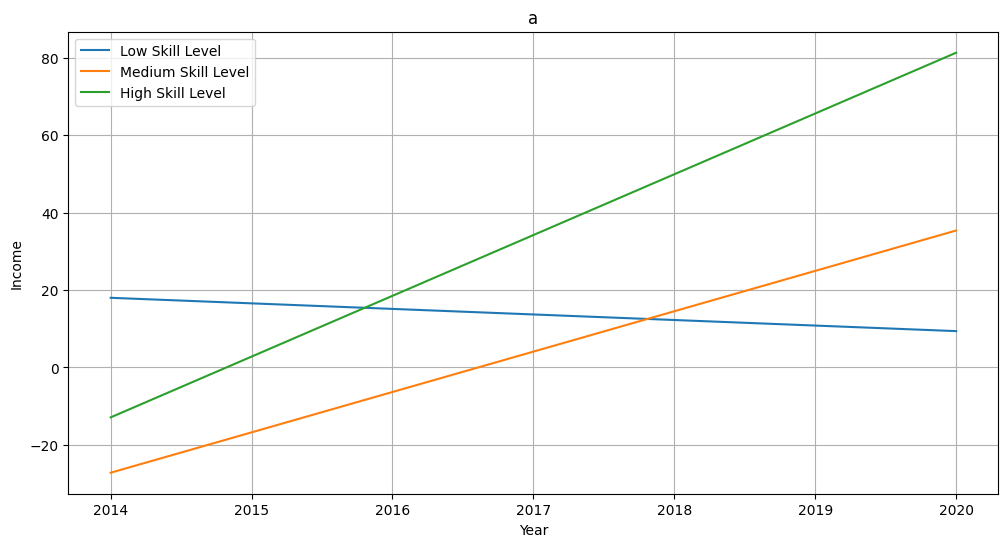

In [8]:
import matplotlib.pyplot as plt
# plot wrt time for Afghanistan 2014 and 2020
plt.figure(figsize=(12, 6))
plt.plot(row['time'], row['low_f']-row['low_m'], label='Low Skill Level')
plt.plot(row['time'], row['med_f']-row['med_m'], label='Medium Skill Level')
plt.plot(row['time'], row['high_f']-row['high_m'], label='High Skill Level')
plt.title('a')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()


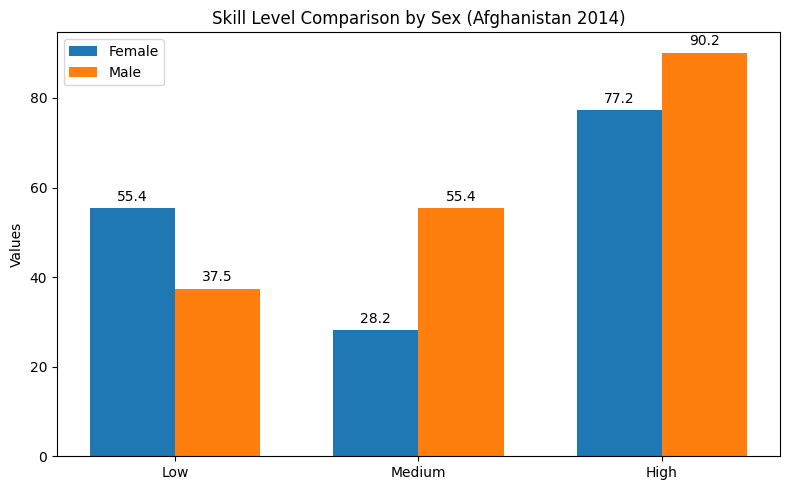

In [9]:




if not row.empty:
    row = row.iloc[0]

    # Define skill level labels and extract female and male values for each
    skill_levels = ['Low', 'Medium', 'High']
    female_values = [row['low_f'], row['med_f'], row['high_f']]
    male_values   = [row['low_m'], row['med_m'], row['high_m']]

    # Plotting setup: grouped bar chart
    import numpy as np
    x = np.arange(len(skill_levels))  # the label locations
    width = 0.35  # width of the bars

    fig, ax = plt.subplots(figsize=(8, 5))
    rects1 = ax.bar(x - width/2, female_values, width, label='Female')
    rects2 = ax.bar(x + width/2, male_values, width, label='Male')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Values')
    ax.set_title('Skill Level Comparison by Sex (Afghanistan 2014)')
    ax.set_xticks(x)
    ax.set_xticklabels(skill_levels)
    ax.legend()

    # Attach a text label above each bar, displaying its height.
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.show()
else:
    print("No data available for Afghanistan 2014")

In [10]:
df['ref_area.label']

1      Afghanistan
2      Afghanistan
3          Albania
4           Angola
5           Angola
          ...     
834         Zambia
835       Zimbabwe
836       Zimbabwe
837       Zimbabwe
838       Zimbabwe
Name: ref_area.label, Length: 838, dtype: object

In [12]:
import pandas as pd
import plotly.express as px
from io import StringIO



# Map countries to development category.
# In this example:
# - Afghanistan and Angola are classified as "Under Developing"
# - Albania and Argentina are classified as "Developed"
# development_mapping = {
#     'Afghanistan': 'Under Developing',
#     'Angola': 'Under Developing',
#     'Albania': 'Developed',
#     'Argentina': 'Developed'
# }
# df['development'] = df['ref_area.label'].map(development_mapping)

# Melt the DataFrame from wide to long format.
# The columns low_f, low_m, med_f, med_m, high_f, high_m, total_f, total_m
# are melted into a single column 'skill_sex', with corresponding 'value'.
melted = df.melt(
    id_vars=['ref_area.label', 'time'],
    value_vars=['low_f','low_m','med_f','med_m','high_f','high_m','total_f','total_m'],
    var_name='skill_sex',
    value_name='value'
)


In [13]:
melted.head()

,ref_area.label,time,skill_sex,value
0,Afghanistan,2014.0,low_f,55.43
1,Afghanistan,2020.0,low_f,52.04
2,Albania,2018.0,low_f,184.0
3,Angola,2019.0,low_f,194.39
4,Angola,2021.0,low_f,171.95


In [ ]:
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.1/386.1 KB 9.6 MB/s eta 0:00:0000:01


In [14]:

# Split the 'skill_sex' column into separate 'skill' and 'sex' columns.
melted['skill'] = melted['skill_sex'].apply(lambda x: x.split('_')[0])
melted['sex'] = melted['skill_sex'].apply(lambda x: x.split('_')[1])

# Define the unique skill categories to plot separately.
skill_categories = melted['skill'].unique()

# Create a Plotly bar chart for each skill category.
for skill in skill_categories:
    # Filter the melted data for the given skill category
    df_skill = melted[melted['skill'] == skill]
    
    # Create a grouped bar chart with facet for development category
    fig = px.bar(
        df_skill,
        x='ref_area.label',
        y='value',
        color='sex',
        barmode='group',
        # facet_col='development',
        title=f"{skill.capitalize()} Skill Values by Country and Sex",
        labels={'value': 'Value', 'ref_area_label': 'Country'}
    )
    
    # Optionally, update layout settings for better appearance
    fig.update_layout(
        height=400,
        width=800,
        margin=dict(l=40, r=40, t=40, b=40)
    )
    
    # Display the figure
    fig.show()

In [18]:
melted.head(10)

,ref_area.label,time,skill_sex,value,skill,sex
0,Afghanistan,2014.0,low_f,55.43,low,f
1,Afghanistan,2020.0,low_f,52.04,low,f
2,Albania,2018.0,low_f,184.0,low,f
3,Angola,2019.0,low_f,194.39,low,f
4,Angola,2021.0,low_f,171.95,low,f
5,Argentina,2004.0,low_f,2.96,low,f
6,Argentina,2005.0,low_f,3.26,low,f
7,Argentina,2006.0,low_f,3.86,low,f
8,Argentina,2008.0,low_f,5.95,low,f
9,Argentina,2009.0,low_f,7.37,low,f


In [22]:
argentina_data.sort_values(by= 'time')

,ref_area.label,time,skill_sex,value,skill,sex
5,Argentina,2004.0,low_f,2.96,low,f
2519,Argentina,2004.0,med_m,3.64,med,m
4195,Argentina,2004.0,high_m,8.13,high,m
1681,Argentina,2004.0,med_f,3.68,med,f
5033,Argentina,2004.0,total_f,4.18,total,f
...,...,...,...,...,...,...
1697,Argentina,2023.0,med_f,1070.15,med,f
859,Argentina,2023.0,low_m,790.26,low,m
21,Argentina,2023.0,low_f,842.06,low,f
5049,Argentina,2023.0,total_f,1256.2,total,f


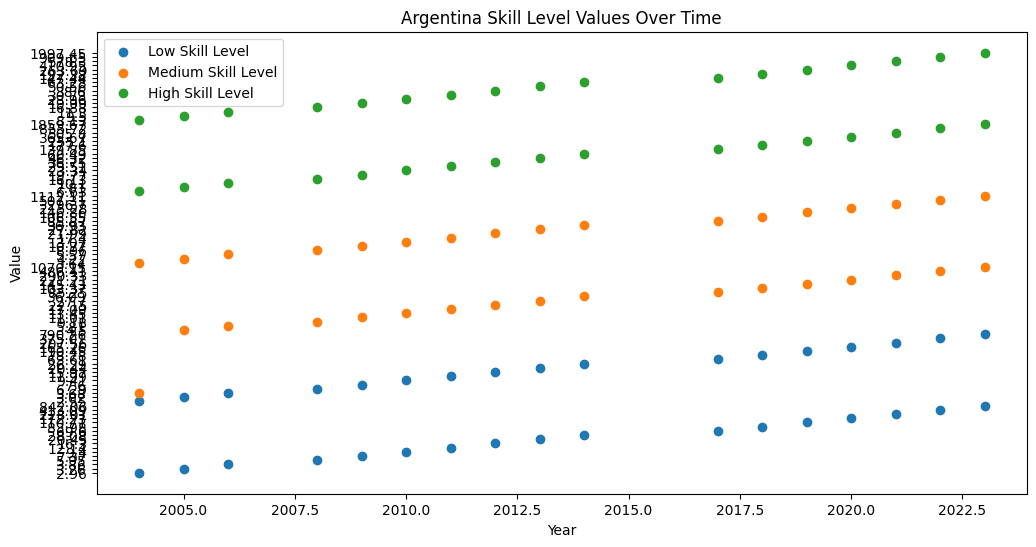

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['ref_area.label', 'time', 'low_f', 'low_m', 'med_f', 'med_m', 'high_f', 'high_m', 'total_f', 'total_m'] but received: value

In [ ]:
# for ref_area.label = Argentina plot logitudinal data m-l for each skill level 

# # Filter the data for Argentina
argentina_data = melted[melted['ref_area.label'] == 'Argentina']


plt.figure(figsize=(12, 6))
plt.scatter(argentina_data[argentina_data['skill'] == 'low']['time'], argentina_data[argentina_data['skill'] == 'low']['value'], label='Low Skill Level')
plt.scatter(argentina_data[argentina_data['skill'] == 'med']['time'], argentina_data[argentina_data['skill'] == 'med']['value'], label='Medium Skill Level')
plt.scatter(argentina_data[argentina_data['skill'] == 'high']['time'], argentina_data[argentina_data['skill'] == 'high']['value'], label='High Skill Level')
plt.title('Argentina Skill Level Values Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
# plt.grid(True)
plt.show()


In [58]:
df.to_csv('pivot_data_cleaned.csv', index=False)

In [60]:
df.columns

Index(['ref_area.label', 'time', 'low_f', 'low_m', 'med_f', 'med_m', 'high_f',
       'high_m', 'total_f', 'total_m'],
      dtype='object')

In [61]:
# convert columns[2:] to numeric
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 1 to 838
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  838 non-null    object 
 1   time            838 non-null    float64
 2   low_f           838 non-null    float64
 3   low_m           838 non-null    float64
 4   med_f           838 non-null    float64
 5   med_m           838 non-null    float64
 6   high_f          838 non-null    float64
 7   high_m          838 non-null    float64
 8   total_f         838 non-null    float64
 9   total_m         838 non-null    float64
dtypes: float64(9), object(1)
memory usage: 65.6+ KB


In [80]:
def toNumeric(df, index):
    for col in df.columns[index:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df = toNumeric(df, 2)



In [78]:

# bar chart for Argentina for each year
import plotly 
import plotly.express as px


# Filter the DataFrame for Argentina
argentina_data = df[(df['ref_area.label'] == 'Argentina')]

# Sort the DataFrame by the 'time' column
argentina= argentina_data.sort_values(by='time')


In [27]:
development_status_data = {
    'Country': ['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Singapore', 'Slovakia', 'Slovenia'],
    'Development Status': ['Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developed', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developed', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developing', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed', 'Developed', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed']
}

development_status_df = pd.DataFrame(development_status_data)

# Merge the development status data with the original DataFrame
df_merged = pd.merge(df, development_status_df, left_on='Country', right_on='Country', how='left')

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m,Development Status
0,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68,Developing
1,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53,Developing
2,Albania,2018.0,184.00,193.00,1005.00,1203.00,1287.00,1359.00,282.00,303.00,Developing
3,Angola,2019.0,194.39,273.48,308.55,393.80,1025.32,1211.48,500.31,678.91,Developing
4,Angola,2021.0,171.95,286.39,295.27,322.43,1111.75,1020.48,500.89,574.06,Developing


In [33]:
# no of values for each unique country with 'Developed' status
df_merged[df_merged['Development Status'] == 'Developing']['Country'].value_counts()

Country
Peru                  24
Mexico                22
Colombia              21
Argentina             17
Chile                 16
Philippines           16
Cambodia              16
Indonesia             15
Egypt                 14
Pakistan              14
Costa Rica            13
Brazil                13
Malaysia              10
Hungary                7
India                  6
Ecuador                6
Bhutan                 5
Russian Federation     4
Armenia                4
Kenya                  3
Latvia                 3
Bulgaria               3
Bangladesh             2
Angola                 2
Poland                 2
Romania                2
Afghanistan            2
Albania                1
Croatia                1
Lithuania              1
Belarus                1
Name: count, dtype: int64

In [45]:
countries

Country
Peru           24
Mexico         22
Colombia       21
Argentina      17
Chile          16
Philippines    16
Cambodia       16
Indonesia      15
Egypt          14
Pakistan       14
Name: count, dtype: int64

In [47]:
# take the first 10 countries wrt value_counts
countries = df_merged[df_merged['Development Status'] == 'Developing']['Country'].value_counts().head(10)

# convert to list 
countries = countries.index.tolist()


# Filter the DataFrame for the selected countries
filtered_df = df_merged[df_merged['Country'].isin(countries)]

filtered_df.head()

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m,Development Status
5,Argentina,2004.0,2.96,2.55,3.68,3.64,6.63,8.13,4.18,4.39,Developing
6,Argentina,2005.0,3.26,3.02,4.50,4.27,7.81,9.50,4.84,5.14,Developing
7,Argentina,2006.0,3.86,3.68,5.81,5.57,10.10,11.30,6.16,6.38,Developing
8,Argentina,2008.0,5.95,6.29,9.18,8.96,16.13,16.88,9.95,10.19,Developing
9,Argentina,2009.0,7.37,7.60,11.01,10.77,19.77,19.99,12.32,12.15,Developing


In [70]:
filtered_df.iloc[:, :10]

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
5,Argentina,2004.0,2.96,2.55,3.68,3.64,6.63,8.13,4.18,4.39
6,Argentina,2005.0,3.26,3.02,4.50,4.27,7.81,9.50,4.84,5.14
7,Argentina,2006.0,3.86,3.68,5.81,5.57,10.10,11.30,6.16,6.38
8,Argentina,2008.0,5.95,6.29,9.18,8.96,16.13,16.88,9.95,10.19
9,Argentina,2009.0,7.37,7.60,11.01,10.77,19.77,19.99,12.32,12.15
...,...,...,...,...,...,...,...,...,...,...
560,Philippines,2018.0,75.10,59.73,66.88,74.09,149.38,150.50,90.67,78.57
561,Philippines,2019.0,82.46,64.16,71.37,78.37,159.60,163.39,97.79,84.07
562,Philippines,2020.0,89.82,74.83,85.71,90.42,199.77,187.31,117.94,97.35
563,Philippines,2021.0,94.23,77.27,85.59,91.71,170.59,168.56,111.81,96.10


In [75]:
df.head()

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
0,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
1,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53
2,Albania,2018.0,184.00,193.00,1005.00,1203.00,1287.00,1359.00,282.00,303.00
3,Angola,2019.0,194.39,273.48,308.55,393.80,1025.32,1211.48,500.31,678.91
4,Angola,2021.0,171.95,286.39,295.27,322.43,1111.75,1020.48,500.89,574.06


In [ ]:
for country in df['Country'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_country_diff(df, [country])
    

In [29]:
df_2 = pd.read_csv('Occupation.csv')
# drop the unnamed 
df_2.drop(columns= ['Unnamed: 0'], inplace= True)
df_2.head()

,Country,time,Armed forces occupations_Female,Armed forces occupations_Male,Managers_Female,Managers_Male,Professionals_Female,Professionals_Male,Technicians and associate professionals_Female,Technicians and associate professionals_Male,...,Service and sales workers_Female,Service and sales workers_Male,"Skilled agricultural, forestry and fishery workers_Female","Skilled agricultural, forestry and fishery workers_Male",Craft and related trades workers_Female,Craft and related trades workers_Male,"Plant and machine operators, and assemblers_Female","Plant and machine operators, and assemblers_Male",Elementary_Female,Elementary_Male
0,Angola,2019,603.95,956.72,1062.22,1058.65,1101.01,1239.13,739.63,1268.49,...,305.21,418.04,172.51,282.10,206.79,406.53,181.88,299.64,194.39,273.48
1,Bangladesh,2017,136.88,109.39,140.12,129.82,104.98,126.71,93.59,86.75,...,48.21,48.29,46.09,41.35,41.01,45.37,47.23,48.79,33.78,39.44
2,Belize,2017,7.00,5.00,5.00,5.00,11.00,11.00,12.00,16.00,...,7.00,7.00,7.00,6.00,5.00,5.00,6.00,7.00,15.00,6.00
3,Belize,2020,4.77,5.91,17.54,17.54,14.19,14.12,10.73,11.63,...,5.19,5.88,4.95,4.38,7.50,7.27,4.35,6.23,4.98,4.62
4,Belize,2021,7.69,4.50,14.62,13.15,12.34,11.83,7.69,9.35,...,4.00,4.70,4.85,3.92,5.77,6.06,3.12,5.23,4.50,4.23


In [66]:
df_ed = pd.read_csv('Uneducation.csv')
df_ed.head()

,Country,Sex,Value,Time
0,Aruba,Male,17.400,2010
1,Aruba,Female,15.640,2010
2,Afghanistan,Male,19.632,2021
3,Afghanistan,Female,65.079,2021
4,Afghanistan,Male,32.164,2020


In [67]:


# pivot the data wrt sex
df_ed_pivot = df_ed.pivot_table(index=['Country', 'Time'],
                                values='Value',
                                columns= 'Sex')

In [174]:
df_ed_pivot.to_csv('Uneducation_pivot.csv')

In [3]:
import pandas as pd
df_ed_pivot = pd.read_csv('Uneducation_pivot.csv')



In [4]:
df_ed_pivot.head()

,Country,Time,Female,Male
0,APEC,2005,21.871,13.597
1,APEC,2006,21.664,13.297
2,APEC,2007,21.262,13.010
3,APEC,2008,21.114,12.969
4,APEC,2009,21.208,13.386


In [69]:
# get max no of values for each country
countries = df_ed_pivot['Country'].value_counts().index.to_list()[:30]


In [71]:
df_ed_pivot[' Female']

0       21.871
1       21.664
2       21.262
3       21.114
4       21.208
         ...  
3890    21.770
3891    36.174
3892    35.561
3893    37.689
3894    36.045
Name:  Female, Length: 3895, dtype: float64

In [6]:
import plotly.graph_objects as go

# Remove leading spaces from column names
df_ed_pivot.columns = df_ed_pivot.columns.str.strip()

def plot_uned(df, countries):
    
    fig = go.Figure()
    for country in countries:
        # Filter the data for the given country
        country_data = df[df['Country'] == country]
        # Sort by time
        country_data = country_data.sort_values(by='Time')
        country_data['Inequality'] = (country_data['Female'] - country_data['Male']) / country_data['Male']
        # Add traces for Female and Male
        fig.add_trace(go.Scatter(x=country_data['Time'], y=country_data['Female'], mode='lines', name=f'Female - {country}'))
        fig.add_trace(go.Scatter(x=country_data['Time'], y=country_data['Inequality'], mode='lines', name=f'{country}'))
        fig.add_trace(go.Scatter(x=country_data['Time'], y=country_data['Male'], mode='lines', name=f'Male - {country}'))
   
        # Update layout
    fig.update_layout(
        title=f'% Youth(18-24) not in education, employment or training in {country} Over Time',
        xaxis_title='Year',
        yaxis_title='% Uneducation',
        legend_title_text='Sex ',
        showlegend=True,
        template='plotly_white',
        title_font=dict(size=18, family='Arial, bold', color='darkblue'),
        xaxis=dict(showgrid=True, gridcolor='lightgrey', tickangle=45),
        yaxis=dict(showgrid=True, gridcolor='lightgrey'),
        legend=dict(
            x=0.5,
            y=-0.2,
            traceorder='normal',
            font=dict(size=12),
            orientation='h',
            xanchor='center',
            yanchor='top'
        ),
        margin=dict(l=40, r=40, t=80, b=80)
    )
    path = f'Results/Education/{country}.html'
    fig.write_html(path)
        
        # fig.show()

# Example usage
# coun
for country in df_ed_pivot['Country'].unique():
    plot_uned(df_ed_pivot, [country])

In [73]:
df_ed_pivot.head()

,Country,Time,Female,Male
0,APEC,2005,21.871,13.597
1,APEC,2006,21.664,13.297
2,APEC,2007,21.262,13.010
3,APEC,2008,21.114,12.969
4,APEC,2009,21.208,13.386


In [ ]:
# Strip any leading or trailing spaces from the column names
from sympy import plot


df_ed_pivot.columns = df_ed_pivot.columns.str.strip()

# plot the data for each country
# for country in countries:
#     # Filter the data for the given country
#     country_data = df_ed_pivot[df_ed_pivot['Country'] == country]
#     plot_uned(df_ed_pivot, [country])
plot_uned(df_ed_pivot, Asia)

In [221]:
df_ed_pivot['Country'].unique()
# every country with World in the name
countries = df_ed_pivot['Country'].unique()
world = [country for country in countries if 'World' in country]
world

['World',
 'World excluding BRICS',
 'World excluding India and China',
 'World: High income',
 'World: Low income',
 'World: Lower-middle income',
 'World: Lower-middle income excluding India',
 'World: Upper-middle income',
 'World: Upper-middle income excluding China']

In [223]:
African = [country for country in countries if 'Africa' in country]

In [227]:
Asia =  [country for country in countries if 'Asia' in country]

In [30]:
for country in df_2['Country'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_country_occupation(df, [country])

NameError: name 'plot_country_occupation' is not defined

In [31]:
df_2.iloc[:, 1:] = df_2.iloc[:, 1:].apply(pd.to_numeric)

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    228 non-null    object 
 1   time                                                       228 non-null    int64  
 2   Armed forces occupations_Female                            228 non-null    float64
 3   Armed forces occupations_Male                              228 non-null    float64
 4   Managers_Female                                            228 non-null    float64
 5   Managers_Male                                              228 non-null    float64
 6   Professionals_Female                                       228 non-null    float64
 7   Professionals_Male                                         228 non-null    float64
 8   Technician

In [33]:
df_2['time ']

0      2019
1      2017
2      2017
3      2020
4      2021
       ... 
223    2020
224    2021
225    2022
226    2023
227    2023
Name: time , Length: 228, dtype: int64

In [38]:
import plotly.express as px
import os
def plot_country_occupation(df, countries):
    for country in countries:
        country_data = df[df['Country'] == country]
        # change time to float
        country_data.iloc[:, 1:] = country_data.iloc[:, 1:].apply(pd.to_numeric)
        country_data = country_data.sort_values(by='time ')
        # # get difference between m and f for occupation
        for col in df.columns[2::2]:  # iterate over female columns
            male_col = col.replace('_Female', '_Male')
            diff_col = col.replace('_Female', '_Diff')
            country_data[diff_col] = (country_data[male_col] - country_data[col]) / country_data[male_col]
        # plot only the difference columns
        diff_cols = [col for col in country_data.columns if 'Diff' in col]
        country_data = country_data[['time '] + diff_cols]
        # Create a line plot
        fig = px.line(country_data, x='time ', y=country_data.columns[2:], title=f'{country} Ocupation Pay Gap Over Time')
        # save the plot to a file in results folder
        Path = f'Results/Occupation/'
        if not os.path.exists(Path):
            os.makedirs(Path)
        path = f'Results/Occupation/{country}_paygap.html'
        fig.write_html(path)
        # plotly.offline.plot(fig, filename=f'{country}_paygap.html')

    fig.show()

for country in df_2['Country'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_country_occupation(df_2, [country])

In [148]:
def plot_country_occupation(df, countries):
    for country in countries:
        country_data = df[df['Country'] == country]
        # change time to float
        country_data.iloc[:, 1:] = country_data.iloc[:, 1:].apply(pd.to_numeric)
        country_data = country_data.sort_values(by='time ')
        
        # get difference between m and f for occupation
        for col in df.columns[2::2]:  # iterate over female columns
            male_col = col.replace('_Female', '_Male')
            diff_col = col.replace('_Female', '_Diff')
            country_data[diff_col] = (country_data[male_col] - country_data[col]) / country_data[male_col]
        
        fig = px.line(country_data, x='time ', y=[col for col in country_data.columns if '_Diff' in col], title=f'{country} Occupation Pay Gap Over Time')
        # save the plot to a file in results folder
        path = f'Results/Occupation/{country}_paygap.html'
        fig.write_html(path)
        # plotly.offline.plot(fig, filename=f'{country}_paygap.html')

    fig.show()

for country in df_2['Country'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_country_occupation(df_2, [country])

In [74]:
df = pd.read_csv('pivot_data_cleaned.csv')

def plot_country_diff(df, countries):
    for country in countries:
        country_data = df[df['Country'] == country]
        country_data = country_data.sort_values(by='time')
        # get difference between m and f for each skill level
        country_data['low_skill_paygap'] = (country_data['low_m'] - country_data['low_f'])/country_data['low_m']
        country_data['med_skill_paygap'] = (country_data['med_m'] - country_data['med_f'])/country_data['med_m']
        country_data['high_skill_paygap'] = (country_data['high_m'] - country_data['high_f'])/country_data['high_m']
        fig = px.line(country_data, x='time', y=country_data.columns[2:], title=f'{country} Skill Level Pay Gap Over Time')
        # save the plot to a file in results folder
        path = f'Results/{country}_paygap.html'
        fig.write_html(path)
        # plotly.offline.plot(fig, filename=f'{country}_paygap.html')

    fig.show()

plot_country_diff(df, ['Peru'])

In [100]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 10.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('pivot_data_cleaned.csv')

def plot_country_diff(df, country):
    
    country_data = df[df['Country'] == country]
    country_data = country_data.sort_values(by='time')
    # get difference between m and f for each skill level
    country_data['low_skill_paygap'] = (country_data['low_m'] - country_data['low_f']) / country_data['low_m']
    country_data['med_skill_paygap'] = (country_data['med_m'] - country_data['med_f']) / country_data['med_m']
    country_data['high_skill_paygap'] = (country_data['high_m'] - country_data['high_f']) / country_data['high_m']
    
    # Create a line plot with smoothed trend lines
    fig = px.scatter(country_data, x='time', y=['low_skill_paygap', 'med_skill_paygap', 'high_skill_paygap'],
                     title=f'{country} Skill Level Pay Gap Over Time', opacity=0.3)
    
    # Add smoothed trend lines
    fig.update_traces(mode='lines+markers')
    fig.add_traces(px.scatter(country_data, x='time', y='low_skill_paygap', trendline='lowess', opacity= 0.1).data[1])
    fig.add_traces(px.scatter(country_data, x='time', y='med_skill_paygap', trendline='lowess',opacity= 0.01).data[1])
    fig.add_traces(px.scatter(country_data, x='time', y='high_skill_paygap', trendline='lowess',opacity= 0.001).data[1])
    
    fig.show()

plot_country_diff(df, 'Peru')

In [26]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output, State
import plotly.express as px
import plotly.io as pio
import base64

# Load the data
df = pd.read_csv('pivot_data_cleaned.csv')

# Initialize the Dash app
app = Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Skill Level Pay Gap Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select Country:"),
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in df['Country'].value_counts().index],
            value=df['Country'].value_counts().index[0],  # Default value
            style={'width': '50%'}
        )
    ], style={'textAlign': 'center', 'marginBottom': '20px'}),
    
    dcc.Graph(id='paygap-graph'),
    
    html.Div([
        html.Button("Save Plot", id="save-button", n_clicks=0),
        dcc.Download(id="download-image")
    ], style={'textAlign': 'center', 'marginTop': '20px'})
])

# Define the callback to update the graph based on dropdown selection
@app.callback(
    Output('paygap-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    country_data = df[df['Country'] == selected_country]
    country_data = country_data.sort_values(by='time')
    # get difference between m and f for each skill level
    country_data['low_skill_paygap'] = (country_data['low_m'] - country_data['low_f']) / country_data['low_m']
    country_data['med_skill_paygap'] = (country_data['med_m'] - country_data['med_f']) / country_data['med_m']
    country_data['high_skill_paygap'] = (country_data['high_m'] - country_data['high_f']) / country_data['high_m']
    
    # Create a line plot with smoothed trend lines
    fig = px.scatter(country_data, x='time', y=['low_skill_paygap', 'med_skill_paygap', 'high_skill_paygap'],
                     title=f'{selected_country} Skill Level Pay Gap Over Time', opacity=0.3)
    
    # Add smoothed trend lines
    fig.update_traces(mode='lines+markers')
    fig.add_traces(px.scatter(country_data, x='time', y='low_skill_paygap', trendline='lowess', trendline_color_override='blue').data[1])
    fig.add_traces(px.scatter(country_data, x='time', y='med_skill_paygap', trendline='lowess', trendline_color_override='red').data[1])
    fig.add_traces(px.scatter(country_data, x='time', y='high_skill_paygap', trendline='lowess', trendline_color_override='green').data[1])
    
    # Update layout to adjust title position and style
    fig.update_layout(
        title={
            'text': f'{selected_country} Skill Level Pay Gap Over Time',
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        margin=dict(l=0, r=5, t=50, b=0),
        title_font=dict(size=20)
    )
    
    return fig

# Define the callback to save the plot
@app.callback(
    Output("download-image", "data"),
    [Input("save-button", "n_clicks")],
    [State("paygap-graph", "figure"), State('country-dropdown', 'value')]
)
def save_plot(n_clicks, figure, selected_country):
    if n_clicks > 0:
        img_bytes = pio.to_image(figure, format='png', engine='kaleido')
        img_base64 = base64.b64encode(img_bytes).decode('utf-8')
        filename = f"{selected_country}_Skill_Level_Pay_Gap_Over_Time.png"
        return dict(content=img_base64, filename=filename)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

In [117]:
pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# no of values for each uniqe country
df['Country'].value_counts()

In [88]:
df.head()

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
0,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
1,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53
2,Albania,2018.0,184.00,193.00,1005.00,1203.00,1287.00,1359.00,282.00,303.00
3,Angola,2019.0,194.39,273.48,308.55,393.80,1025.32,1211.48,500.31,678.91
4,Angola,2021.0,171.95,286.39,295.27,322.43,1111.75,1020.48,500.89,574.06


In [83]:
argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 6 to 22
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  17 non-null     object 
 1   time            17 non-null     float64
 2   low_f           17 non-null     float64
 3   low_m           17 non-null     float64
 4   med_f           17 non-null     float64
 5   med_m           17 non-null     float64
 6   high_f          17 non-null     float64
 7   high_m          17 non-null     float64
 8   total_f         17 non-null     float64
 9   total_m         17 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.5+ KB


In [63]:
argentina

,ref_area.label,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
6,Argentina,2004.0,2.96,2.55,3.68,3.64,6.63,8.13,4.18,4.39
7,Argentina,2005.0,3.26,3.02,4.5,4.27,7.81,9.5,4.84,5.14
8,Argentina,2006.0,3.86,3.68,5.81,5.57,10.1,11.3,6.16,6.38
9,Argentina,2008.0,5.95,6.29,9.18,8.96,16.13,16.88,9.95,10.19
10,Argentina,2009.0,7.37,7.6,11.01,10.77,19.77,19.99,12.32,12.15
11,Argentina,2010.0,9.4,9.41,13.45,13.07,23.34,23.96,15.13,14.86
12,Argentina,2011.0,12.14,11.99,17.09,17.4,29.51,30.73,19.37,19.64
13,Argentina,2012.0,16.3,15.97,22.15,21.99,36.75,38.6,24.82,24.6
14,Argentina,2013.0,20.45,20.44,27.7,27.82,46.32,50.56,31.25,31.58
15,Argentina,2014.0,28.08,26.29,36.09,36.93,60.49,63.28,41.11,40.91


In [85]:

# Calculate the difference between male and female internet usage
argentina['low'] = argentina['low_f'] - argentina['low_m']
argentina['med'] = argentina['med_f'] - argentina['med_m']
argentina['high'] = argentina['high_f'] - argentina['high_m']
argentina['total'] = argentina['total_f'] - argentina['total_m']

# Create a bar chart for the differences
fig = px.bar(argentina, x='time', y=['low', 'med', 'high', 'total'],
             title='Difference in Wages Between Male and Female in Argentina by Year',
             labels={'time': 'Year', 'value': 'Difference in Wages'},
             barmode='group')
fig.show()

In [ ]:
# convert time to string
argentina['time'] = argentina['time'].astype('str')
# # Standardize the data by subtracting the mean and dividing by the standard deviation
# columns_to_standardize = ['low_f', 'low_m', 'med_f', 'med_m', 'high_f', 'high_m', 'total_f', 'total_m']
# argentina[columns_to_standardize] = argentina[columns_to_standardize].apply(lambda x: (x - x.mean()) / x.std())


In [53]:
# Create a bar chart for Argentina for each year
fig = px.scatter(argentina, x='time', y=['low_f', 'low_m', 'med_f', 'med_m', 'high_f', 'high_m', 'total_f', 'total_m'],
             title='Argentina Internet Usage by Year',
             labels={'time': 'Year', 'value': 'Internet Usage'},
             )
# Create a bar chart for Argentina for each year
fig = px.bar(argentina, x='time', y=columns_to_standardize,
             title='Standardized Argentina Internet Usage by Year',
             labels={'time': 'Year', 'value': 'Standardized Internet Usage'},
             barmode='group')


# Show the plot
fig.show()

In [ ]:

# Create a bar chart for Argentina for each year
fig = px.bar(argentina_data, x='time', y='value', title='Argentina Internet Usage by Year',
             labels={'time': 'Year', 'obs_value': 'Internet Usage'})

# Show the plot
fig.show()

In [ ]:
df_pivot_1.dropna(inplace=True)



In [ ]:

# 2) Keep only rows where Sex is either "Male" or "Female" 
#    (exclude "Total" if it doesn't represent a single sex)
df = df[df["sex.label"].isin(["Sex: Male", "Sex: Female"])]

# 3) Pivot the data so that each OccupationSkillLevel has separate columns for Male and Female incomes
#    - We assume the occupation skill level is in a column named "OccupationSkillLevel"
#    - The numeric income measure is in "Income"
df_pivot = df.pivot_table(
    index="classif1.label", 
    columns="sex.label", 
    values="obs_value", 
    # aggfunc="mean"  # or sum, or whatever is appropriate
)

# 4) Calculate the gender gap measure for each occupation skill level:
#    gender_gap = (Male_income - Female_income) / Male_income
df_pivot["gender_gap"] = (df_pivot["Male"] - df_pivot["Female"]) / df_pivot["Male"]

# 5) Inspect the resulting DataFrame
print(df_pivot)

# 6) Plot the gender gap as a bar chart
plt.figure(figsize=(8, 5))
df_pivot["gender_gap"].plot(kind="bar", color="skyblue")

plt.title("Gender Gap by Occupation Skill Level")
plt.xlabel("Occupation Skill Level")
plt.ylabel("Gender Gap ((M - F)/M)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

In [1]:
import pandas as pd

hypertensiondata = "RELAY_WHS.csv"
hypertension = pd.read_csv(hypertensiondata)


In [3]:
hypertension.columns

Index(['IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE', 'DIM_TIME',
       'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE',
       'DIM_PUBLISH_STATE_CODE', 'IND_NAME', 'GEO_NAME_SHORT', 'DIM_SEX',
       'RATE_PER_100_N', 'RATE_PER_100_NL', 'RATE_PER_100_NU'],
      dtype='object')

In [ ]:
# get country == ['Bangladesh', 'USA', 'Rawanda']
hypertension_bangladesh = hypertension[hypertension['GEO_NAME_SHORT'].isin(['Bangladesh'])]


In [11]:
hypertension_bangladesh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 18585
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  90 non-null     object 
 1   IND_CODE                90 non-null     object 
 2   IND_UUID                90 non-null     object 
 3   IND_PER_CODE            90 non-null     object 
 4   DIM_TIME                90 non-null     int64  
 5   DIM_TIME_TYPE           90 non-null     object 
 6   DIM_GEO_CODE_M49        90 non-null     int64  
 7   DIM_GEO_CODE_TYPE       90 non-null     object 
 8   DIM_PUBLISH_STATE_CODE  90 non-null     object 
 9   IND_NAME                90 non-null     object 
 10  GEO_NAME_SHORT          90 non-null     object 
 11  DIM_SEX                 90 non-null     object 
 12  RATE_PER_100_N          90 non-null     float64
 13  RATE_PER_100_NL         90 non-null     float64
 14  RATE_PER_100_NU         90 non-null     float6

In [ ]:
coloumns = [ 'DIM_TIME', 'IND_NAME', 'GEO_NAME_SHORT', 'DIM_SEX',
       'RATE_PER_100_N', 'RATE_PER_100_NL', 'RATE_PER_100_NU']

In [14]:
hypertension_bangladesh = hypertension_bangladesh[coloumns]

In [39]:
from cProfile import label
import plotly.express as px
import plotly.graph_objects as go

def plot_hypertension(df, country):
    # Filter the data for the specified country
    country_data = df[df['GEO_NAME_SHORT'] == country]
    
    # Sort the data by time
    country_data = country_data.sort_values(by='DIM_TIME')
    
    # Create a plotly figure
    fig = go.Figure()
    indicator = country_data['IND_NAME'].unique()[0]
    
    # Add traces for each sex and indicator
    for sex in country_data['DIM_SEX'].unique():
        data = country_data[(country_data['DIM_SEX'] == sex)]
        fig.add_trace(go.Scatter(x=data['DIM_TIME'], y=data['RATE_PER_100_N'], mode='lines+markers', name=f'{sex}-N'))
        # fig.add_trace(go.Scatter(
        #     x=data['DIM_TIME'], 
        #     y=data['RATE_PER_100_NL'], 
        #     name=f'{sex}-Lower Bound',
        #     mode='lines', 
        #     line=dict(width=0),
        #     showlegend=False
        # ))
        # fig.add_trace(go.Scatter(
        #     x=data['DIM_TIME'], 
        #     y=data['RATE_PER_100_NU'], 
        #     name = f'{sex}-Upper Bound',
        #     mode='lines', 
        #     line=dict(width=0),
        #     fill='tonexty', 
        #     fillcolor='rgba(0,100,80,0.2)', 
        #     showlegend=False
        # ))
    # Update layout to ensure the legend is visible and improve appearance
    fig.update_layout(
        title=f'{indicator} in {country} Over Time',
        xaxis_title='Year',
        yaxis_title='Rate Per 100 N',
        legend_title_text='Sex and Indicator',
        showlegend=True,
        template='plotly_white',
        title_font=dict(size=24, family='Arial, bold', color='darkblue'),
        xaxis=dict(showgrid=True, gridcolor='lightgrey', tickangle=45),
        yaxis=dict(showgrid=True, gridcolor='lightgrey'),
        legend=dict(
            x=0.5,
            y=-0.2,
            traceorder='normal',
            font=dict(size=12),
            orientation='h',
            xanchor='center',
            yanchor='top'
        ),
        margin=dict(l=40, r=40, t=80, b=80)
    )
    
    path = f'Results/Hypertension/{country}.html'
    fig.write_html(path)
    
    fig.show()

# Example usage
plot_hypertension(hypertension, 'Bangladesh')


In [ ]:
for country in hypertension['GEO_NAME_SHORT'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_hypertension(hypertension, country)
    # save the plot to a file in results folder 



In [ ]:
hypertension_bangladesh.tail

,DIM_TIME,IND_NAME,GEO_NAME_SHORT,DIM_SEX,RATE_PER_100_N,RATE_PER_100_NL,RATE_PER_100_NU
3405,2018,Hypertension in adults (age 30 to 79),Bangladesh,MALE,23.6,18.6,29.1
15973,2018,Hypertension in adults (age 30 to 79),Bangladesh,TOTAL,28.6,24.9,32.5
8,2019,Hypertension in adults (age 30 to 79),Bangladesh,FEMALE,34.2,28.2,40.7
12390,2019,Hypertension in adults (age 30 to 79),Bangladesh,MALE,23.5,17.9,29.8
16663,2019,Hypertension in adults (age 30 to 79),Bangladesh,TOTAL,28.8,24.6,33.2


In [64]:
import re
import os
def plot_metric(df, country):
    # Filter the data for the specified country
    country_data = df[df['GEO_NAME_SHORT'] == country]
    
    # Sort the data by time
    country_data = country_data.sort_values(by='DIM_TIME')
    
    # Create a plotly figure
    fig = go.Figure()
    indicator = country_data['IND_NAME'].unique()[0]
    
    # Use regex to filter columns that match the pattern 'RATE_PER_*_N'
    rate_columns = country_data.filter(regex='RATE_PER.*N').columns
    
    # Add traces for each sex and indicator
    for sex in country_data['DIM_SEX'].unique():
        data = country_data[country_data['DIM_SEX'] == sex]
        for col in rate_columns:
            fig.add_trace(go.Scatter(x=data['DIM_TIME'], y=data[col], mode='lines+markers', name=f'{sex}'))
            break
    # Update layout to ensure the legend is visible and improve appearance
    fig.update_layout(
        title=f'{indicator} in {country} Over Time',
        xaxis_title='Year',
        yaxis_title=f'{rate_columns[0]}',
        legend_title_text='Sex',
        showlegend=True,
        template='plotly_white',
        title_font=dict(size=20, family='Arial, bold', color='darkblue'),
        xaxis=dict(showgrid=True, gridcolor='lightgrey', tickangle=45),
        yaxis=dict(showgrid=True, gridcolor='lightgrey'),
        legend=dict(
            x=0.5,
            y=-0.2,
            traceorder='normal',
            font=dict(size=12),
            orientation='h',
            xanchor='center',
            yanchor='top'
        ),
        margin=dict(l=40, r=40, t=80, b=80)
    )
    folder = re.sub(r'\W+', '', indicator)
    new = f'Results/{folder}'
    if not os.path.exists(new):
        os.makedirs(f'Results/{folder}')
    path = f'Results/{folder}/{country}.html'
    fig.write_html(path)
    
    # fig.show()

# Example usage
plot_metric(hypertension, 'Bangladesh')


In [65]:
import os
path = 'Health_Data'

# for each csv file in the folder
for file in os.listdir(path):
    # 
    if file.endswith('.csv'):
        # read the csv file
        df = pd.read_csv(path+"/"+file)
        # plot the data
        for country in df['GEO_NAME_SHORT'].unique():
            plot_metric(df, country)
            print(f'{country} plotted')
        print(f'{file} done')
        # save the plot to a file in results folder

Guyana plotted
Saint Kitts and Nevis plotted
San Marino plotted
Sao Tome and Principe plotted
Serbia plotted
South Africa plotted
Chile plotted
Colombia plotted
Comoros plotted
Kuwait plotted
Kyrgyzstan plotted
Libya plotted
Hungary plotted
India plotted
Iraq plotted
Suriname plotted
Eswatini plotted
Sweden plotted
Switzerland plotted
Togo plotted
Estonia plotted
Finland plotted
Viet Nam plotted
Zimbabwe plotted
Sudan plotted
Germany plotted
Senegal plotted
Chad plotted
Qatar plotted
Sierra Leone plotted
Burundi plotted
Cabo Verde plotted
Croatia plotted
Denmark plotted
Poland plotted
Romania plotted
Botswana plotted
Cambodia plotted
Bolivia (Plurinational State of) plotted
Brazil plotted
Central African Republic plotted
Democratic Republic of the Congo plotted
Nigeria plotted
Niue plotted
Bhutan plotted
Mozambique plotted
Nauru plotted
Nepal plotted
Norway plotted
World plotted
Australia plotted
Belize plotted
Monaco plotted
Mongolia plotted
Oman plotted
Azerbaijan plotted
Malta plott